## Importing Required Modules

In [1]:
import warnings

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.preprocessing import LabelEncoder

## Loading Dataset From the Source

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/Guhan-B/Carte-Blanch-Machine-Learning-Workshop/main/Iris.csv")

In [3]:
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


## Exploratory Data Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
data.groupby('Species').count().Id

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Id, dtype: int64

In [7]:
features = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
target = "Species"

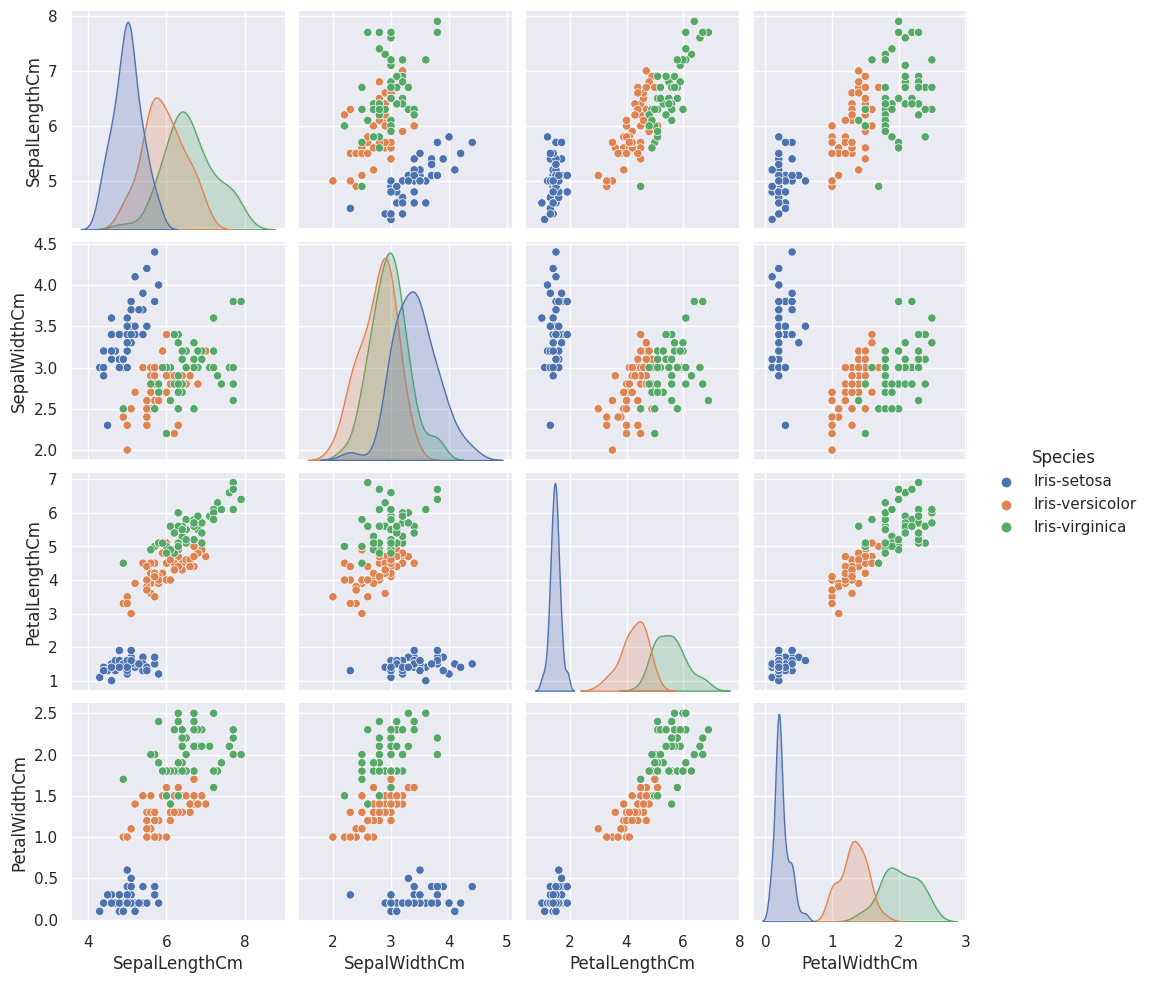

In [8]:
sns.set_theme()
sns.pairplot(data[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "Species"]], hue="Species")
plt.show()

## Encoding Labels

In [9]:
species_le = LabelEncoder()
encoded_data = data.copy()
encoded_data['Species'] = species_le.fit_transform(data['Species'])
encoded_data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
5,6,5.4,3.9,1.7,0.4,0
6,7,4.6,3.4,1.4,0.3,0
7,8,5.0,3.4,1.5,0.2,0
8,9,4.4,2.9,1.4,0.2,0
9,10,4.9,3.1,1.5,0.1,0


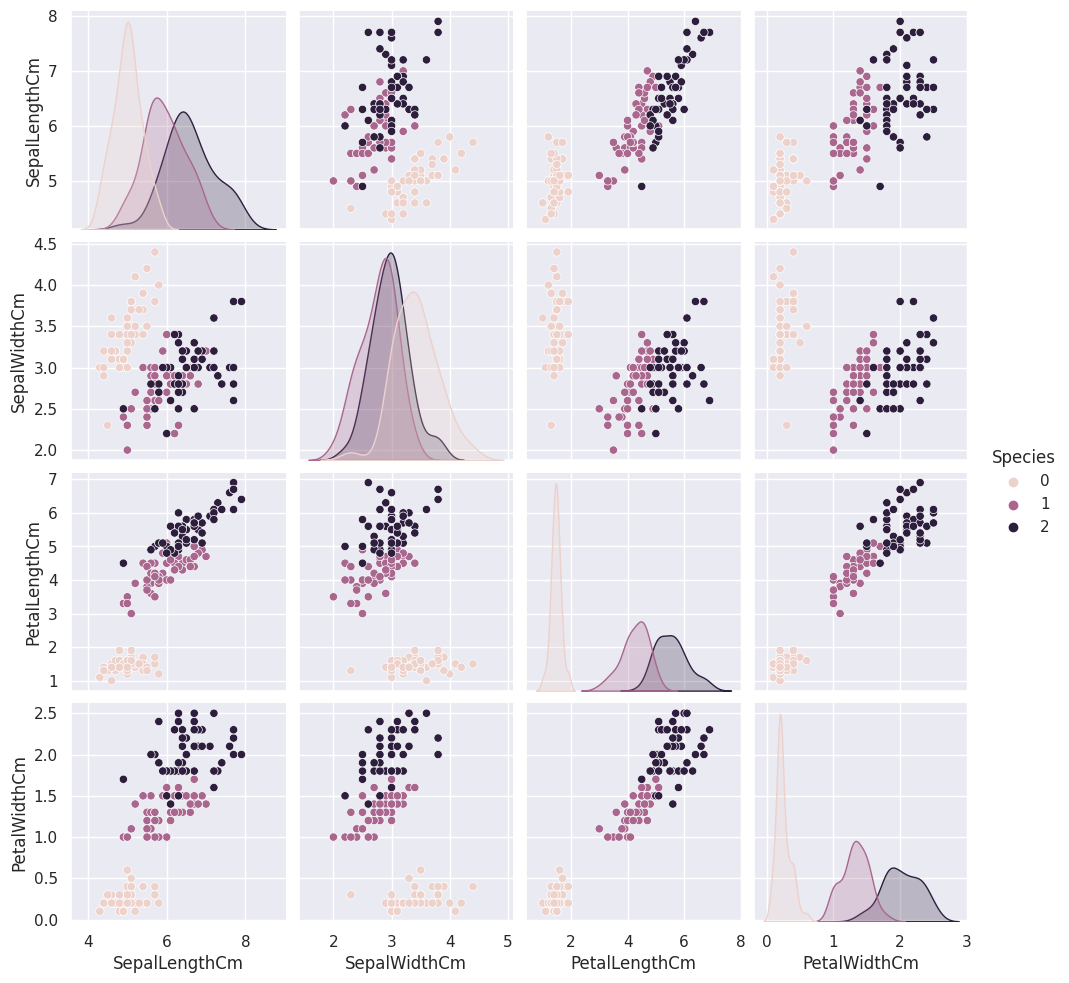

In [10]:
sns.pairplot(encoded_data[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "Species"]], hue="Species")
plt.show()

## KMeans Model

In [ ]:
kmeans_model = KMeans(n_clusters=3, n_init=10)
kmeans_model = kmeans_model.fit(encoded_data[features])
encoded_data["SpeciesPredicted"] = kmeans_model.predict(encoded_data[features])

In [ ]:
sns.pairplot(encoded_data[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "SpeciesPredicted"]], hue="SpeciesPredicted")
plt.show()

## Elbow Method

In [ ]:
distortions = []
inertias = []
mapping_1 = {}
mapping_2 = {}
X = encoded_data[features]
for k in range(1, 10):
    kmeanModel = KMeans(n_clusters=k, n_init=10).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
    mapping_1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]
    mapping_2[k] = kmeanModel.inertia_

In [ ]:
plt.plot(range(1, 10), distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('SSWC')
plt.title('The Elbow Method using Distortion')
plt.show()

In [ ]:
kmeans_model = KMeans(n_clusters=2, n_init=10)
kmeans_model = kmeans_model.fit(encoded_data[features])
encoded_data["SpeciesPredicted"] = kmeans_model.predict(encoded_data[features])

In [ ]:
sns.pairplot(encoded_data[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "SpeciesPredicted"]], hue="SpeciesPredicted")
plt.show()

## Silhouette Score

In [ ]:
kmeans_model = KMeans(n_clusters=2, n_init=10)
kmeans_model = kmeans_model.fit(encoded_data[features])
encoded_data["SpeciesPredicted"] = kmeans_model.predict(encoded_data[features])

In [ ]:
ss_2_cluster = silhouette_score(encoded_data[features], encoded_data["SpeciesPredicted"])

In [ ]:
print(ss_2_cluster)

In [ ]:
kmeans_model = KMeans(n_clusters=3, n_init=10)
kmeans_model = kmeans_model.fit(encoded_data[features])
encoded_data["SpeciesPredicted"] = kmeans_model.predict(encoded_data[features])

In [ ]:
ss_3_cluster = silhouette_score(encoded_data[features], encoded_data["SpeciesPredicted"])

In [ ]:
print(ss_3_cluster)